In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bisect

In [2]:
data = pd.read_csv('data.csv')

In [3]:
def quantize(rainfall):
    # For sampling the input 
    breakpoints = [i for i in range(0,1500,250)]    
    if rainfall>1500:
        return len(breakpoints) + 1
    
    i = bisect.bisect_left(breakpoints, rainfall)  # left insertion index returned
    
    return i
# for if it will rain or not 
#     if score>0:
#         return 1
#     else:
#         return 0


Text(0.5, 1.0, 'Month vs Rainfall')

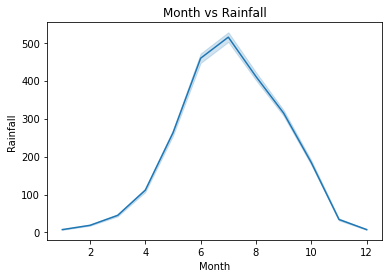

In [4]:
df = pd.DataFrame(data)
sns.lineplot(x= df['Month'], y= df['Rainfall']) 
plt.title("Month vs Rainfall") 


In [5]:
RainLevel = []
for rainfall in data['Rainfall']:

    RainLevel.append(quantize(rainfall))
df['RainLevel'] = RainLevel
df = df.drop(['Unnamed: 0', 'YEAR', 'X_COR', 'Y_COR', 'LATITUDE',
      'LONGITUDE', 'ALT' ], axis=1)
cols = ['Rainfall',]
df[cols] = df[cols].applymap(np.int64)


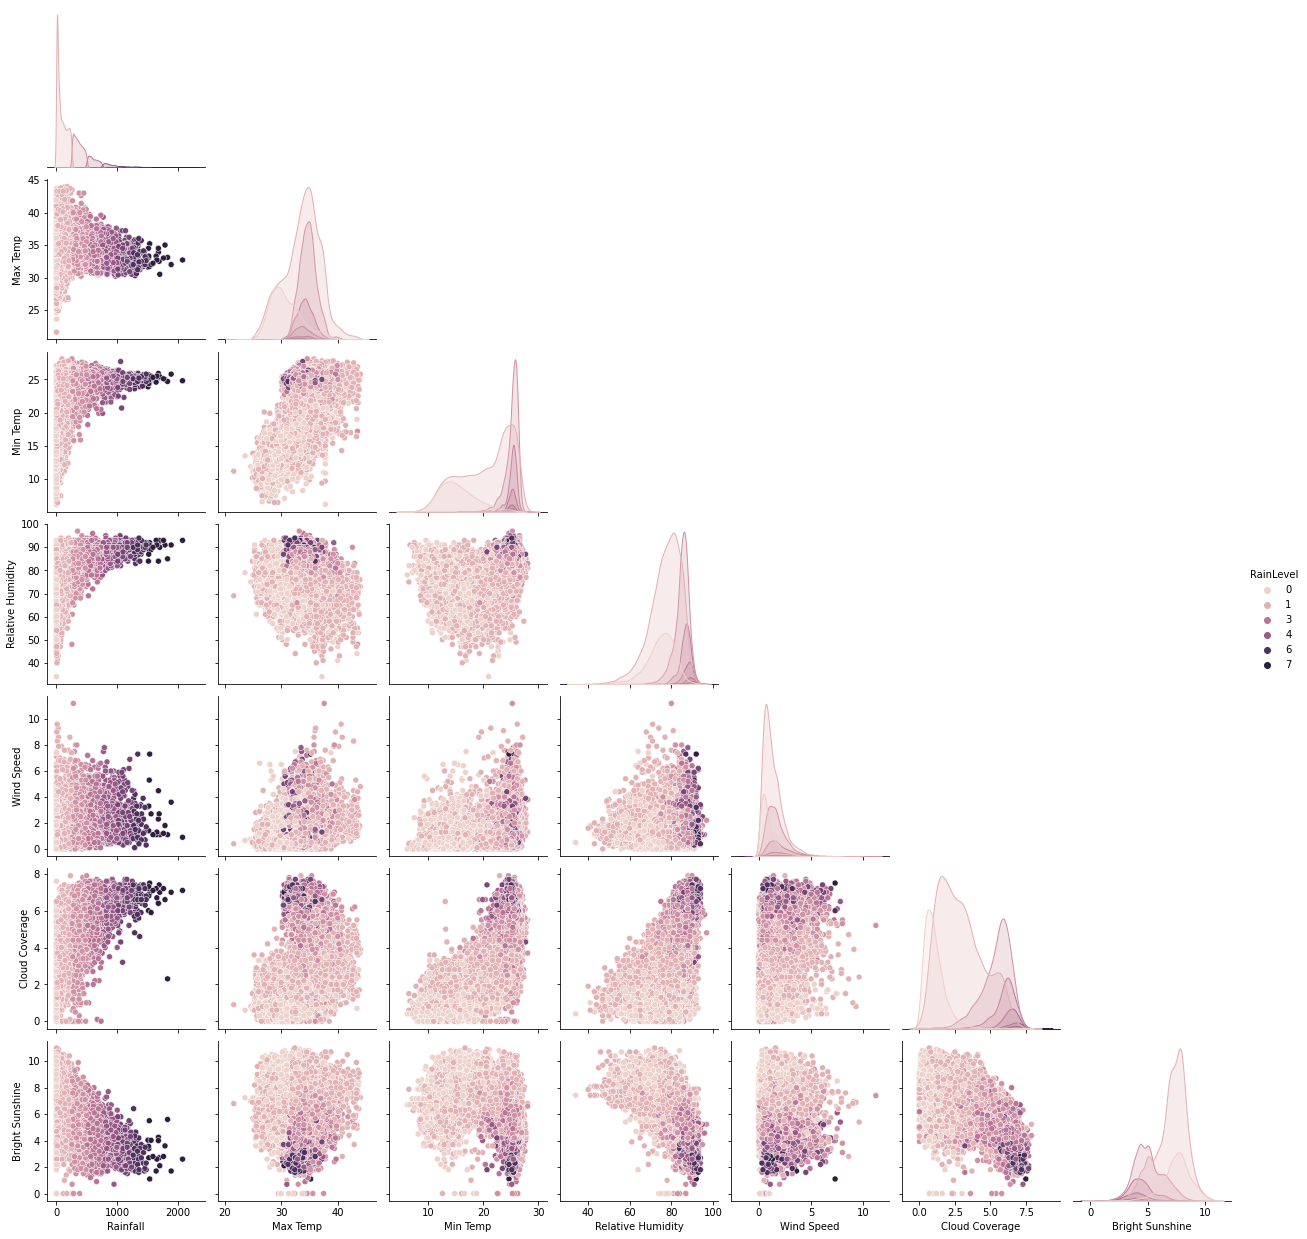

In [6]:
sns.pairplot(df[['Rainfall','Max Temp', 'Min Temp', 'RainLevel', 'Relative Humidity','Wind Speed','Cloud Coverage','Bright Sunshine']], hue='RainLevel', corner=True)
# Uncomment to save the figure 
#plt.savefig('pairplot.png', dpi=100, bbox_inches='tight')

<AxesSubplot:>

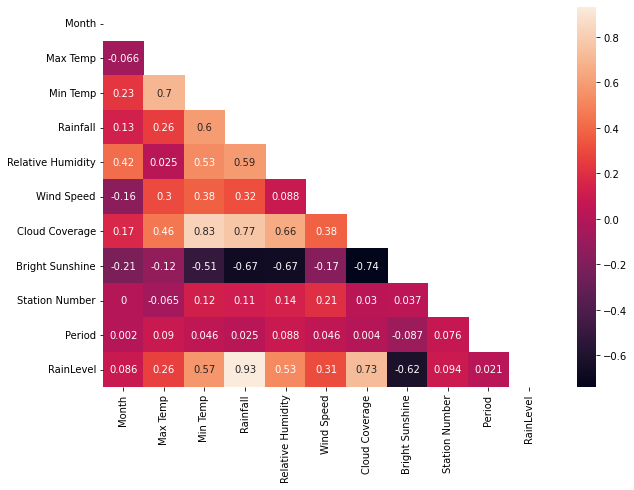

In [7]:
correlation_matrix = df.corr().round(3)
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 7))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask = mask)
# Uncomment to save the figure 
#plt.savefig('correlation.png', dpi=100, bbox_inches='tight')

In [8]:
x = df[['Cloud Coverage', 'Min Temp','Bright Sunshine' ]]
y = df['RainLevel']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 16)

In [9]:
from sklearn import svm 
from sklearn import metrics 
import numpy as np
model_svm = svm.SVC()
model_svm.fit(X_train, y_train) 
y_prediction_svm = model_svm.predict(X_test) 

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

tp = [95,156,117,176,29]
cc = [3.11,2.51,3.11,2.71,2.21]
mt = [23.41,23.01,23.91,23.01,21.91]
bs = [7.21,8.11,7.31,8.01,8.51]
pdt = pd.DataFrame({'Cloud Coverage':cc,'Min Temp':mt,'Bright Sunshine':bs })
y_svm = model_svm.predict(pdt)

pdt,tp,y_svm

(   Cloud Coverage  Min Temp  Bright Sunshine
 0            3.11     23.41             7.21
 1            2.51     23.01             8.11
 2            3.11     23.91             7.31
 3            2.71     23.01             8.01
 4            2.21     21.91             8.51,
 [95, 156, 117, 176, 29],
 array([1, 1, 1, 1, 1]))

In [10]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) 
y_prediction_dt = model_dt.predict(X_test) 
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
y_dt = model_dt.predict(pdt)
pdt,tp,y_dt

(   Cloud Coverage  Min Temp  Bright Sunshine
 0            3.11     23.41             7.21
 1            2.51     23.01             8.11
 2            3.11     23.91             7.31
 3            2.71     23.01             8.01
 4            2.21     21.91             8.51,
 [95, 156, 117, 176, 29],
 array([1, 1, 1, 1, 1]))

In [11]:

from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train) 
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
y_knn = model_knn.predict(pdt)
pdt,tp,y_knn

(   Cloud Coverage  Min Temp  Bright Sunshine
 0            3.11     23.41             7.21
 1            2.51     23.01             8.11
 2            3.11     23.91             7.31
 3            2.71     23.01             8.01
 4            2.21     21.91             8.51,
 [95, 156, 117, 176, 29],
 array([1, 1, 1, 1, 1]))

In [12]:

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() 
model_nb.fit(X_train, y_train) 
y_prediction_nb = model_nb.predict(X_test) 
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
y_nb = model_nb.predict(pdt)
pdt,tp,y_nb

(   Cloud Coverage  Min Temp  Bright Sunshine
 0            3.11     23.41             7.21
 1            2.51     23.01             8.11
 2            3.11     23.91             7.31
 3            2.71     23.01             8.01
 4            2.21     21.91             8.51,
 [95, 156, 117, 176, 29],
 array([1, 1, 1, 1, 1]))

In [13]:
print('The accuracy of the SVM is: {}'.format(score_svm))
print('The accuracy of the DT is: {}'.format(score_dt))
print('The accuracy of the KNN is: {}'.format(score_knn))
print('The accuracy of the NB is: {}'.format(score_nb))

The accuracy of the SVM is: 0.6493
The accuracy of the DT is: 0.5612
The accuracy of the KNN is: 0.5979
The accuracy of the NB is: 0.5821
